# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 6</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 1 - Guia de Análise Exploratória de Dados com Python e Linguagem SQL

![title](imagens/mini-projeto1.png)

Neste Mini-Projeto vamos apresentar um guia básico de análise exploratória de dados usando Linguagem Python, Linguagem SQL e Banco de Dados SQLite. Usaremos dados reais disponíveis publicamente, dados sobre filmes no <a href="https://www.imdb.com/interfaces/">IMDB</a>.

Guias avançados de Análise Exploratória de Dados são fornecidos na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>.

Para aprender mais sobre Linguagem SQL:

- <a href="https://www.datascienceacademy.com.br/path-player?courseid=microsoft-power-bi-para-data-science">SQL Analytics Básico</a>
- <a href="https://www.datascienceacademy.com.br/course/modelagem-de-banco-de-dados-relacionais-nao-relacionais-e-data-stores">SQL Analytics Avançado</a>

Ao aplicar Análise Exploratória de Dados vamos responder a estas 10 perguntas:

- 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?
- 2- Qual o Número de Títulos Por Gênero?
- 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?
- 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?
- 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?
- 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.
- 7- Qual a Relação Entre Duração e Gênero?
- 8- Qual o Número de Filmes Produzidos Por País?
- 9- Quais São os Top 10 Melhores Filmes?
- 10- Quais São os Top 10 Piores Filmes?

## Instalando e Carregando Pacotes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.12


https://pypi.org/

https://pypi.org/project/imdb-sqlite/

In [ ]:
# Instala o pacote
!pip install -q imdb-sqlite

Agora executamos o pacote para download dos datasets.

## Import

In [ ]:
import re

#Permite a utilização de expressões regulares.

In [ ]:
import time

#Manipulação de datas e horários, com formato apropriado

In [ ]:
import sqlite3

#Permite a utilização de SQL.

In [ ]:
!pip install -q pycountry
import pycountry

#Lida com países através de códigos ISO.
#As informações dos países de origem dos filmes no IMMDB respode a esses códigos.

     |████████████████████████████████| 10.1 MB 6.5 MB/s 


In [ ]:
import numpy as np

#Manipulação de dados em matrizes multidimmensionais.
# https://www.codingame.com/playgrounds/52723/programacao-python-parte-3---prof--marco-vaz/pacote-numpy

In [ ]:
import pandas as pd

#Manipulação e análise de dados

In [ ]:
import matplotlib.pyplot as plt

#Visualização de dados.

In [ ]:
import seaborn as sns

#Visualização de dados.

In [ ]:
from matplotlib import cm

#Coloração dos gráficos

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Machine Learning
# CountVectorizer serve para transformar as variáveis categóricas em dumb.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.set_theme(style = "whitegrid")

#Estipula que todos os gráficos terão white grid, tela branca.

## Carregando os Dados

Primeiro temos que baixar os dados!

In [ ]:
%%time
#Mostra quanto tempo leva para a célula (no notebook) ser executada

!imdb-sqlite
#Faz download dos arquivos e carrega o banco de dados.
#Não se esqueça de importar o pacote antes.z

2021-12-26 18:55:19,056 GET https://datasets.imdbws.com/name.basics.tsv.gz -> downloads/name.basics.tsv.gz
2021-12-26 18:55:23,923 GET https://datasets.imdbws.com/title.basics.tsv.gz -> downloads/title.basics.tsv.gz
2021-12-26 18:55:28,305 GET https://datasets.imdbws.com/title.akas.tsv.gz -> downloads/title.akas.tsv.gz
2021-12-26 18:55:34,722 GET https://datasets.imdbws.com/title.principals.tsv.gz -> downloads/title.principals.tsv.gz
2021-12-26 18:55:42,930 GET https://datasets.imdbws.com/title.episode.tsv.gz -> downloads/title.episode.tsv.gz
2021-12-26 18:55:44,585 GET https://datasets.imdbws.com/title.ratings.tsv.gz -> downloads/title.ratings.tsv.gz
2021-12-26 18:55:44,712 Populating database: imdb.db
2021-12-26 18:55:44,713 Applying schema
2021-12-26 18:55:44,714 Importing file: downloads/name.basics.tsv.gz
2021-12-26 18:55:44,714 Reading number of rows ...
2021-12-26 18:55:50,419 Inserting rows into table: people
100% 11321690/11321690 [02:04<00:00, 90775.13 rows/s]
2021-12-26 18:5

In [ ]:
# Conecta no banco de dados
conn = sqlite3.connect("imdb.db")

In [ ]:
# Extrai a lista de tabelas
tabelasDF = pd.read_sql_query("SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'", conn)

# Assim como o sqlite, .read_sql_query executa uma query em uma conexão com um DB.
#? A conexão teve que ser criada com o sqlite.
# Selecione NAME como "Table_Name" de sqlite_master, onde type='table'
# sqlite_master é uma tabela-catálogo que lista o conteúdo do database.
# O parâmetro "conn" remete à conexão com imdb.db

#Alterei o nome do objeto para tabelasDF para ficar mais didático.

In [ ]:
## TESTE ##
tabelateste = pd.read_sql_query("SELECT * FROM sqlite_master",conn)
tabelateste

,type,name,tbl_name,rootpage,sql
0,table,people,people,2,CREATE TABLE people (\n person_id VARCHAR PRI...
1,index,sqlite_autoindex_people_1,people,3,None
2,table,titles,titles,4,CREATE TABLE titles (\n title_id VARCHAR PRIM...
3,index,sqlite_autoindex_titles_1,titles,5,None
4,table,akas,akas,6,"CREATE TABLE akas (\n title_id VARCHAR,\n ti..."
5,table,crew,crew,7,"CREATE TABLE crew (\n title_id VARCHAR,\n pe..."
6,table,episodes,episodes,8,CREATE TABLE episodes (\n episode_title_id IN...
7,table,ratings,ratings,9,CREATE TABLE ratings (\n title_id VARCHAR PRI...
8,index,sqlite_autoindex_ratings_1,ratings,10,None
9,index,ix_people_name,people,1399946,CREATE INDEX ix_people_name ON people (name)


In [ ]:
## TESTE ##
print(tabelasDF)
display(tabelasDF)
# Estas são as tabelas que estão disponíveis no banco de dados baixado
# Chamar o objeto mostra a tabela.

  Table_Name
0     people
1     titles
2       akas
3       crew
4   episodes
5    ratings


,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes
5,ratings


In [ ]:
# Tipo do objeto
type(tabelasDF)

#É um objeto Dataframe do pacote Pandas.

pandas.core.frame.DataFrame

In [ ]:
# Visualiza o resultado
tabelasDF.head()

#.head é um método do objeto.

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes


In [ ]:
# Vamos converter o dataframe em uma lista
tabelas = tabelasDF["Table_Name"].values.tolist()

# Sobrescrevendo a instância "tabelas" como uma lista, cujos itens são os valores da coluna "Table_Name".
# Cada item é uma string.
# Lembrando que o nome original dessa coluna era apenas "name", mas foi alterada quando o Select foi salvo no objeto.

In [ ]:
print(tabelas)
print(type(tabelas))
print()
for i in tabelas:
  print(type(i))

['people', 'titles', 'akas', 'crew', 'episodes', 'ratings']
<class 'list'>

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
# Vamos percorrer a lista de tabelas no banco de dados e extrair o esquema de cada uma
for item in tabelas:                                # Para cada str na lista tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(item) # crie uma string-query usando o nome do item
    resultado = pd.read_sql_query(consulta, conn)   # Crie um dataframe com a query "consulta" na conexão "conn"
    print("Esquema da tabela:", item)               # Imprima o texto e o nome da str corrente
    display(resultado)                              # mostre, com a função "display" o dataframe salvo como "resultado"
    print("-"*57)                                   # imprima um hifem 100 vezer (para fazer uma linha)
    print("\n")                                     # pule duas linhas (um print vazio já pularia uma linha)

# A string preenche o espaço entre chaves com o parâmetro de .format; equivale a começar a string com f.
# Sobre o comando PRAGMA: https://www.sqlite.org/pragma.html
# PRAGMA TABLE_INFO busca os nomes e características das colunas de determinada tabela.
# O laço puxa essas informações de cada tabela existente no DB, através do nome de cada tabela contido na lista "tabelas".

# A lista de nomes foi usada como referência para chamar cada tabela no DB (através da conexão).

Esquema da tabela: people


,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0


---------------------------------------------------------


Esquema da tabela: titles


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0


---------------------------------------------------------


Esquema da tabela: akas


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0


---------------------------------------------------------


Esquema da tabela: crew


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0


---------------------------------------------------------


Esquema da tabela: episodes


,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0


---------------------------------------------------------


Esquema da tabela: ratings


,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


---------------------------------------------------------




> Agora começamos a Análise Exploratória dos Dados.

## 1- Quais São as Categorias de Filmes Mais Comuns no IMDB?

Quais são os principais tipos (categorias) dos títulos (filmes)?

In [ ]:
# Cria a consulta SQL
# Nada mais que uma string
consulta1 = '''SELECT type, COUNT(*) AS COUNT FROM titles GROUP BY type'''

#Selecione a coluna "type" e uma coluna de contagem de todo os tipos disponíveis, como COUNT (não como COUNT(*)) da tabela "titles", em ordem de "type"
#Na consulta anterior, vimos que há uma tabela "titles" no DB.

In [ ]:
# Extrai o resultado
resultado1 = pd.read_sql_query(consulta1, conn)

#A consulta1 é aplicada à conexão conn e salva como dataframe, através de .read_sql_query

In [ ]:
# Visualiza o resultado1
display(resultado1)

,type,COUNT
0,movie,597375
1,short,847948
2,tvEpisode,6378471
3,tvMiniSeries,41262
4,tvMovie,134189
5,tvPilot,2
6,tvSeries,218363
7,tvShort,10424
8,tvSpecial,35370
9,video,255943


In [ ]:
# Vamos calcular o percentual para cada tipo
resultado1['percentual'] = (resultado1['COUNT'] / resultado1['COUNT'].sum()) * 100

# Conforme "resultado1" é um dataframe, "COUNT" e "type" são colunas.
# Os nomes das colunas podem ser chamadas como índices de uma lista ou chaves de um dicionário, com o nome tratado como string
# Como num dicionário, é possível criar uma coluna nova chamando-a como índice. Os valores dessa coluna podem ser baseadas em outras colunas.
# O método .sum() retorna um número só, que é a soma de todos os valores da coluna.

In [ ]:
# Visualiza o resultado, dessa vez com o percentual
display(resultado1)

,type,COUNT,percentual
0,movie,597375,6.987377
1,short,847948,9.918279
2,tvEpisode,6378471,74.607707
3,tvMiniSeries,41262,0.482633
4,tvMovie,134189,1.569582
5,tvPilot,2,0.000023
6,tvSeries,218363,2.554149
7,tvShort,10424,0.121927
8,tvSpecial,35370,0.413716
9,video,255943,2.993714


In [ ]:
# Vamos criar um gráfico com apenas 4 categorias:
# As 3 categorias com mais títulos e 1 categoria com todo o restante

# Cria um dicionário vazio
others = {}

# Filtra o percentual em 5% e soma o total
others['COUNT'] = resultado1[resultado1['percentual'] < 5]['COUNT'].sum()
# Um novo item é inserido no dicionário others, cuja chave é a string 'COUNT'
# O valor da chave COUNT é a soma {.sum} dos valores de COUNT nos quais o percentual é menor que 5.

# Grava o percentual
others['percentual'] = resultado1[resultado1['percentual'] < 5]['percentual'].sum()
# Um novo item é inserido no dicionário others, cuja chave é a string 'percentual'
# O valor da chave COUNT é a soma {.sum} dos valores de 'percentual' nos quais o percentual é menor que 5.

# Ajusta o nome
others['type'] = 'others'
# Um novo item é inserido no dicionário others, cuja chave é a string 'type'
# e cujo valor é a string 'others'.

In [ ]:
## TESTE ##

#Mostra todos os resultados, mas apenas as linhas cujo percentual é menor que 2
display(resultado1[resultado1['percentual'] < 2])
print()

#Mostra todos os resultados, mas apenas as linhas cujo percentual é menor que 2
display(resultado1[resultado1['percentual'] < 5])
print()

# Mostra apenas a coluna COUNT, apenas as linhas cujo percentual é menor que 5
display(resultado1[resultado1['percentual'] < 5]['COUNT'])
print()

# Mostra a soma dos valores de COUNT cujo percentual é menor que 5
display(resultado1[resultado1['percentual'] < 5]['COUNT'].sum())

## TESTE ##

,type,COUNT,percentual
3,tvMiniSeries,41262,0.482633
4,tvMovie,134189,1.569582
5,tvPilot,2,0.000023
7,tvShort,10424,0.121927
8,tvSpecial,35370,0.413716
10,videoGame,29999,0.350892


,type,COUNT,percentual
3,tvMiniSeries,41262,0.482633
4,tvMovie,134189,1.569582
5,tvPilot,2,0.000023
6,tvSeries,218363,2.554149
7,tvShort,10424,0.121927
8,tvSpecial,35370,0.413716
9,video,255943,2.993714
10,videoGame,29999,0.350892


3      41262
4     134189
5          2
6     218363
7      10424
8      35370
9     255943
10     29999
Name: COUNT, dtype: int64

725552

In [ ]:
# Visualiza
# Na célula (não teste) anterior, foram inseridas no dicionário combinações de chave-valor correspondentes a cada coluna da tabela de interesse - Resultado1
print(others)

{'COUNT': 725552, 'percentual': 8.486637457414872, 'type': 'others'}


In [ ]:
# Filtra o dataframe de resultado
# Ao contrário do comando acima, o resultado1 será sobrescrito por todos os seus valores, mas somente os que tiverem o percentual maior que 5.
resultado1 = resultado1[resultado1['percentual'] > 5]

In [ ]:
# Append com o dataframe de outras categorias
# O primeiro parâmetro do .append é um dicionário
# O segundo método do .append é ...
resultado1 = resultado1.append(others, ignore_index = True)

In [ ]:
# Ordena o resultado
# Sobrescrevendo o resultado1 com sua própria reorganização em ordem de COUNT.
# ascending = False: ordem decrescente.
resultado1 = resultado1.sort_values(by = 'COUNT', ascending = False)

In [ ]:
# Visualiza
resultado1.head()

,type,COUNT,percentual
2,tvEpisode,6378471,74.607707
1,short,847948,9.918279
3,others,725552,8.486637
0,movie,597375,6.987377


In [ ]:
# Visualiza melhor
display(resultado1)

,type,COUNT,percentual
2,tvEpisode,6378471,74.607707
1,short,847948,9.918279
3,others,725552,8.486637
0,movie,597375,6.987377


In [ ]:
# Ajusta os labels
# labels é uma lista contendo strings
labels = [str(resultado1['type'][i])+' '+'['+str(round(resultado1['percentual'][i],2)) +'%'+']' for i in resultado1.index]

# A lista é criada por list compreention
# Para cada item em resultado1.index:
#   string do item encontrado em "type" daquele item
#   adiciona um espaço, mais um abre-colchetes em str
#   string do valor arredondado (duas casas) encontrado em 'percentual' daquele item
#   adiciona um fecha-conchetes

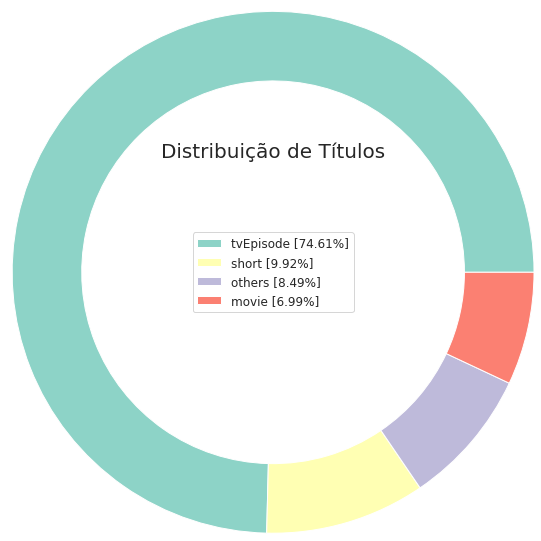

In [ ]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(resultado1['COUNT'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

## 2- Qual o Número de Títulos Por Gênero?

Vamos calcular o número de filmes por gênero e entregar o resultado em valor percentual.

In [ ]:
# Cria a consulta SQL
consulta2 = '''SELECT genres, COUNT(*) FROM titles WHERE type = 'movie' GROUP BY genres''' 

#Selecione "genres" e "COUNT (tudo)" {o COUNT é uma coluna que também altera quais linhas serão exibidas} de "titles", mas somente onde "type" for "movie"; agrupado por "genre"

In [ ]:
# Resultado
resultado2 = pd.read_sql_query(consulta2, conn)

#A variável "resultado2" é um objeto do pandas.
# É um dataframe (uma tabela) oriunda da aplicação da query (string) "consulta2" aplicada ao banco de dados através da conexão "conn"

In [ ]:
# Visualiza o resultado
display(resultado2)

,genres,COUNT(*)
0,Action,13696
1,"Action,Adult",11
2,"Action,Adult,Adventure",2
3,"Action,Adult,Comedy",5
4,"Action,Adult,Crime",10
...,...,...
1447,"Thriller,Western",43
1448,War,1282
1449,"War,Western",13
1450,Western,5112


In [ ]:
# Converte as strings para minúsculo
resultado2['genres'] = resultado2['genres'].str.lower().values

# Sobrescrevendo os valores da coluna "genres" por valores da coluna "genres" só que minúsculos {str.lower().values}
# Foi usando um método do pacote "str" para alterar o texto.

display(resultado2)

,genres,COUNT(*)
0,action,13696
1,"action,adult",11
2,"action,adult,adventure",2
3,"action,adult,comedy",5
4,"action,adult,crime",10
...,...,...
1447,"thriller,western",43
1448,war,1282
1449,"war,western",13
1450,western,5112


Os gêneros possuem mais itens em uma mesma coluna.

In [ ]:
# Remove valores NA (ausentes)
temp = resultado2['genres'].dropna()

# Dropna() é um método de objetos dataframe do pandas
# "temp" é o "resultado2['genres']" sem os resultados NA

Usamos o Countvectorizer para converter a coluna de gêneros em um vetor one-hot encoded para contar o número de filmes em cada gênero.

![title](imagens/one-hot.png)

In [ ]:
# Vamos criar um vetor usando expressão regular para filtrar as strings

# https://docs.python.org/3.8/library/re.html
padrao = '(?u)\\b[\\w-]+\\b'

#(?u)
#\b estabelece uma borda
#[\\w-]+ é um conjunto com dois elementos, podendo haver em qualquer quantidade maior ou ingual a 1.
#  \w estabelece qualquer letra ou número, incluindo underline
#  - é um hífem, literalmente
#\b estabelece outra borda


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

# CountVectorizer é um módulo que transforma uma variável categórica em variáveis dummy.
# Em token_pattern recebe a expressão regular salva acima como string
# .fit é um método que define onde o texto será aplicado o Regex

#Cada match encontrado na coluna "genre" (salvos em "temp") é um token.

In [ ]:
type(vetor)

#É um objeto do tipo "vetorizador de contagem"

sklearn.feature_extraction.text.CountVectorizer

In [ ]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()
print(generos_unicos)
print(type(generos_unicos))

#.feature_names() retorna uma lista com todos os tokens

['action', 'adult', 'adventure', 'animation', 'biography', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir', 'game-show', 'history', 'horror', 'music', 'musical', 'mystery', 'n', 'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war', 'western']
<class 'list'>


O .fit treina o vetor com o "temp".

In [ ]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

#"bag_generos" é a aplicação de um método, .transform, do objeto 'vetorizador de contagem'
#Essa é a aplicação da separação por tokens à coluna genre, transformando-a em outras colunas

Neste caso, o vetor é treinado pelo "temp" e também aplicado ao "temp".

In [ ]:
print(type(bag_generos))
print()

#É um objeto do tipo 'csr_matrix' do pacote "scipy"

print(bag_generos)
print()
display(bag_generos)

<class 'scipy.sparse.csr.csr_matrix'>

  (0, 0)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  (3, 0)	1
  (3, 1)	1
  (3, 5)	1
  (4, 0)	1
  (4, 1)	1
  (4, 6)	1
  (5, 0)	1
  (5, 1)	1
  (5, 7)	1
  (6, 0)	1
  (6, 1)	1
  (6, 8)	1
  (7, 0)	1
  (7, 1)	1
  (7, 10)	1
  (8, 0)	1
  (8, 1)	1
  (8, 14)	1
  (9, 0)	1
  :	:
  (1437, 23)	1
  (1437, 26)	1
  (1438, 24)	1
  (1439, 24)	1
  (1439, 25)	1
  (1440, 24)	1
  (1440, 26)	1
  (1441, 24)	1
  (1441, 27)	1
  (1442, 24)	1
  (1442, 28)	1
  (1443, 25)	1
  (1444, 26)	1
  (1445, 26)	1
  (1445, 27)	1
  (1446, 26)	1
  (1446, 27)	1
  (1446, 28)	1
  (1447, 26)	1
  (1447, 28)	1
  (1448, 27)	1
  (1449, 27)	1
  (1449, 28)	1
  (1450, 28)	1
  (1451, 18)	1



<1452x29 sparse matrix of type '<class 'numpy.int64'>'
	with 4025 stored elements in Compressed Sparse Row format>

In [ ]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [ ]:
## TESTE ##

print(type(bag_generos.todense()))
print()
print(bag_generos.todense())
print()
print(type(bag_generos.todense()[1]))
print()
print(bag_generos.todense()[1])

print()
print(type(bag_generos.todense()[1][0]))
print()
print(bag_generos.todense()[1][0])

# Sempre será uma matriz do Numpy.

<class 'numpy.matrix'>

[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

<class 'numpy.matrix'>

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]

<class 'numpy.matrix'>

[[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
# Visualiza
generos.info()

#Forma uma tabela de informações das colunas que serão usadas como variáveis dummy.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1451
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1452 non-null   int64
 1   adult        1452 non-null   int64
 2   adventure    1452 non-null   int64
 3   animation    1452 non-null   int64
 4   biography    1452 non-null   int64
 5   comedy       1452 non-null   int64
 6   crime        1452 non-null   int64
 7   documentary  1452 non-null   int64
 8   drama        1452 non-null   int64
 9   family       1452 non-null   int64
 10  fantasy      1452 non-null   int64
 11  film-noir    1452 non-null   int64
 12  game-show    1452 non-null   int64
 13  history      1452 non-null   int64
 14  horror       1452 non-null   int64
 15  music        1452 non-null   int64
 16  musical      1452 non-null   int64
 17  mystery      1452 non-null   int64
 18  n            1452 non-null   int64
 19  news         1452 non-null   int64
 20  reality-

In [ ]:
# Drop da coluna n
generos = generos.drop(columns = 'n', axis = 0)

## Este comando só pode ser executado uma vez, já que a coluna 'n' só pode ser removida uma vez.

In [ ]:
#Vejamos as colunas novamente, mas sem a coluna 'n'
display(generos.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1451
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   action       1452 non-null   int64
 1   adult        1452 non-null   int64
 2   adventure    1452 non-null   int64
 3   animation    1452 non-null   int64
 4   biography    1452 non-null   int64
 5   comedy       1452 non-null   int64
 6   crime        1452 non-null   int64
 7   documentary  1452 non-null   int64
 8   drama        1452 non-null   int64
 9   family       1452 non-null   int64
 10  fantasy      1452 non-null   int64
 11  film-noir    1452 non-null   int64
 12  game-show    1452 non-null   int64
 13  history      1452 non-null   int64
 14  horror       1452 non-null   int64
 15  music        1452 non-null   int64
 16  musical      1452 non-null   int64
 17  mystery      1452 non-null   int64
 18  news         1452 non-null   int64
 19  reality-tv   1452 non-null   int64
 20  romance 

None

In [ ]:
# Calcula o percentual
generos_percentual = 100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0]

# Percentual = 100 * cada valor / soma de todos os valores
# O método .sort_values(ascending = False) pede que o pd.Series seja dado em ordem decrescente.

In [ ]:
### TESTE ###
#Vejamos do que se trata cada variável acima.

display(generos.shape)
print(type(generos.shape))
# generos.shape é uma tupla, cujo primeiro valor é o total e cuja alocação é a coluna 28.

print()

display(pd.Series(generos.sum()))
print(type(pd.Series(generos.sum())))
# pd.Series(generos.sum()) é a SOMA dos valores em cada coluna.
# Seu tipo é um objeto Séries do pacote pandas. 'pandas.core.series.Series'

print()

display(generos.sum())
print(type(generos.sum()))

print()
print(type(pd.Series(generos.sum())) == type(generos.sum()))

#Os tipos são iguais

(1452, 28)

<class 'tuple'>



action         208
adult           89
adventure      217
animation      161
biography      157
comedy         245
crime          190
documentary    231
drama          265
family         164
fantasy        178
film-noir       35
game-show        6
history        169
horror         174
music          158
musical        151
mystery        180
news            49
reality-tv      45
romance        194
sci-fi         160
short           27
sport          119
talk-show       13
thriller       177
war            133
western        129
dtype: int64

<class 'pandas.core.series.Series'>



action         208
adult           89
adventure      217
animation      161
biography      157
comedy         245
crime          190
documentary    231
drama          265
family         164
fantasy        178
film-noir       35
game-show        6
history        169
horror         174
music          158
musical        151
mystery        180
news            49
reality-tv      45
romance        194
sci-fi         160
short           27
sport          119
talk-show       13
thriller       177
war            133
western        129
dtype: int64

<class 'pandas.core.series.Series'>

True


In [ ]:
# Visualiza
generos_percentual.head(10)

drama          18.250689
comedy         16.873278
documentary    15.909091
adventure      14.944904
action         14.325069
romance        13.360882
crime          13.085399
mystery        12.396694
fantasy        12.258953
thriller       12.190083
dtype: float64

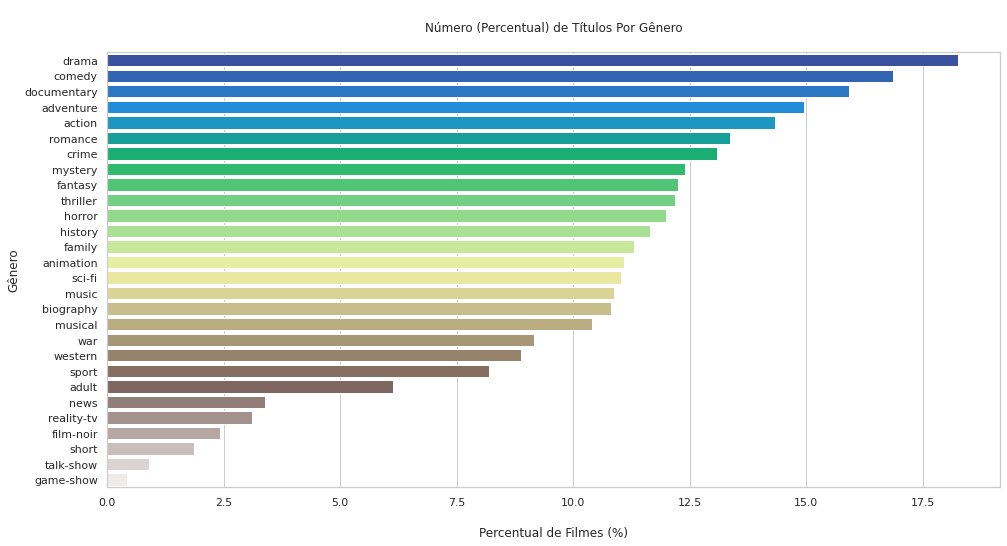

In [ ]:
# Plot
plt.figure(figsize = (16,8))
#Atribui o tamanho do gráfico.

sns.barplot(x = generos_percentual.values, y = generos_percentual.index, orient = "h", palette = "terrain")
#Este seria outro objeto, que contém as informações de qual é o eixo X e qual é o eixo Y, qual é a orientação (no caso, horizontal) e a paleta de cores.
#? Seria interessante verificar o que é o generos_percentual.values e o generos_percentual.index

plt.ylabel('Gênero')
# 
plt.xlabel("\nPercentual de Filmes (%)")
plt.title('\nNúmero (Percentual) de Títulos Por Gênero\n')
plt.show()

# Pela estrutura, entende-se que já existe, com o carregamento o pacote de plot, um objeto, cujo nome é o nome do pacote: neste caso, 'plt'.
# Os métodos vão dando atributos ao objeto.

## 3- Qual a Mediana de Avaliação dos Filmes Por Gênero?

Mediana de avaliação dos filmes.

In [ ]:
# Consulta SQL
consulta3 = '''
            SELECT rating, genres FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ''' 
# Selecione as colunas rating e genres
# Da tabela 'ratings' junto com a tabela "titles" em que a coluna 'title_id' da tabela 'ratings' seja igual à coluna 'title_id' da tabela 'titles'.
# mas apenas onde o valor em 'premiered' for menor ou igual a 2022 E 'type' for igual a 'movie'

In [ ]:
# Resultado
resultado3 = pd.read_sql_query(consulta3, conn)

# Salvando a query acima, aplicada à conexão 'conn'.

In [ ]:
# Visualiza
display(resultado3)

# Mostrando todas as linhas das tabelas 'rating' e 'titles'.

,rating,genres
0,4.5,\N
1,6.1,"Action,Adventure,Biography"
2,5.2,Drama
3,4.5,Drama
4,3.8,Drama
...,...,...
272605,3.5,"Action,Adventure,Thriller"
272606,5.8,Thriller
272607,6.4,"Drama,History"
272608,3.8,"Adventure,History,War"


In [ ]:
# Vamos criar uma função para retornar os genêros
def retorna_generos(df): # Insere um dataframe
    df['genres'] = df['genres'].str.lower().values # A coluna 'genres' do dataframe é ele mesmo, mas tudo em minúsculo.
    temp = df['genres'].dropna()                   # Derruba os valores NA
    vetor = CountVectorizer(token_pattern = '(?u)\\b[\\w-]+\\b', analyzer = 'word').fit(temp) # Cria um vetor para separar os nomes únicos.
    generos_unicos =  vetor.get_feature_names() # forma uma lista de gêneros encontrados.
    print(type(generos_unicos)) ### TESTE ##
    print(len(generos_unicos))### TESTE ##
    generos_unicos = [genre for genre in generos_unicos if len(genre) > 1] # list comprehention para manter apenas os gêneros compostos por mais que uma letra.
    print(len(generos_unicos))### TESTE ## Um item foi removido.
    return generos_unicos

    # Tudo que é feito nesta função foi executado na questão anterior.

In [ ]:
# Aplica a função
generos_unicos = retorna_generos(resultado3)

# O dataframe estava salvo em 'resultado3'

<class 'list'>
29
28


In [ ]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
# Cria listas vazias
genero_counts = [] # Para fazer a contagem de filmes por gênero
genero_ratings = [] # Para fazer a contagem de avaliações

In [ ]:
# Loop
for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn) #salva a query como 'resultado'
    genero_counts.append(resultado.values[0][0]) # Adiciona o primeiro valor da primeira linha de cada execução da query
    # Se fosse pedido o item 0 apenas (e não o item 0 do item 0), daria na mesma. Apenas o tipo de cada item seria um ndarray, não um int64
    # Não existe resultado.values[1][0], nem resultado.values[0][1].

    #Selecione a contagem de itens diferentes em "Rating"
    # Da tabela 'rating' junto com a tabela 'titles', mas apenas onde os ids sejam iguais
    # Onde o dado de 'genres'  é como \%item%\ (item é um i em generos_unicos) e o valor em 'type' equivala a \movie\
  
     # Retorna a avaliação de filmes por gênero
    consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    resultado = pd.read_sql_query(consulta, conn) # Mostra o rating de cada filmes que corresponda ao gênero da vez.
    genero_ratings.append(np.median(resultado['rating'])) # Do pacote numpy, pede a mediana da "lista" de números contidas na tabela 'rating' do dataframe 'resultado'.

    #Selecione 'rating'
    # da tabela 'ratings' junto com a tabela 'title' onde os ids sejam iguais
    # Onde 'genres' coincide com o item da vez, e 'type' seja 'movie'.

In [ ]:
### TESTE ###

#genero_countsTEST = []

#for item in generos_unicos:
    
    # Retorna a contagem de filmes por gênero
    #consulta = 'SELECT COUNT(rating) FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    #resultado = pd.read_sql_query(consulta, conn) #salva a query como 'resultado'
    #display(resultado)
    #genero_countsTEST.append(resultado.values[0][0]) # Adiciona o primeiro valor da primeira linha de cada execução da query
    #print(type(resultado.values[0][0]))

#print(genero_countsTEST)

# Simplesmente, forma uma lista de números, na ordem da lista de gêneros, com a quantidade de filmes que respondem àquele gênero, memso que responda a outros.

In [ ]:
### TESTE ###

#genero_ratingsTEST = []

#for item in generos_unicos:
    #consulta = 'SELECT rating FROM ratings JOIN titles ON ratings.title_id=titles.title_id WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\''
    #resultado = pd.read_sql_query(consulta, conn) # Mostra o rating de cada filmes que corresponda ao gênero da vez.
    #genero_ratingsTEST.append(np.median(resultado['rating'])) # Do pacote numpy, pede a mediana da "lista" de números contidas na tabela 'rating' do dataframe 'resultado'.
    #display(np.median(resultado['rating']))
    #print(type(resultado['rating']))
    #print(type(np.median(resultado['rating'])))
    #print()
    

In [ ]:
# Prepara o dataframe final
df_genero_ratings_18 = pd.DataFrame() # Criando um dataframe novo, do pacote pandas.
df_genero_ratings_18['genres'] = generos_unicos # Criado com o bag of words
df_genero_ratings_18['count'] = genero_counts # Criado no loop, descreve quanos itens há naquele gênero
df_genero_ratings_18['rating'] = genero_ratings # Criado no loop, descreve a mediana de rating daquele gênero.

# NÃO ESQUECER: As colunas 'count' e 'rating' dependem da base de dados original.

# Como dicionários, determinar um valor para uma chave que não existe cria a combinação nova de chave-valor.
# Neste caso, determinar que a coluna que nã existia corresponde a determinada lista adiciona a lista ao dataframe sob aquele nome de coluna.

In [ ]:
# Visualiza
df_genero_ratings_18.head(40)

,genres,count,rating
0,action,28255,5.8
1,adult,4200,5.9
2,adventure,17136,6.0
3,animation,4789,6.4
4,biography,8218,7.0
5,comedy,67587,6.0
6,crime,23269,6.1
7,documentary,40276,7.3
8,drama,120853,6.3
9,family,10582,6.3


In [ ]:
# Drop do índice 18 (news)
# Não queremos essa informação como gênero
df_genero_ratings = df_genero_ratings_18.drop(index = 18)

# Esse método .drop é nativa do pandas.

In [ ]:
# Ordena o resultado
df_genero_ratings = df_genero_ratings.sort_values(by = 'rating', ascending = False)

# O método .sort_values é nativo do pacote pandas, apilcado a um dataframe.
# 'by' define qual coluna será usada para organizar os dados.
# 'ascending' determina se será uma ordem crescente ou não (no caso, decrescente)

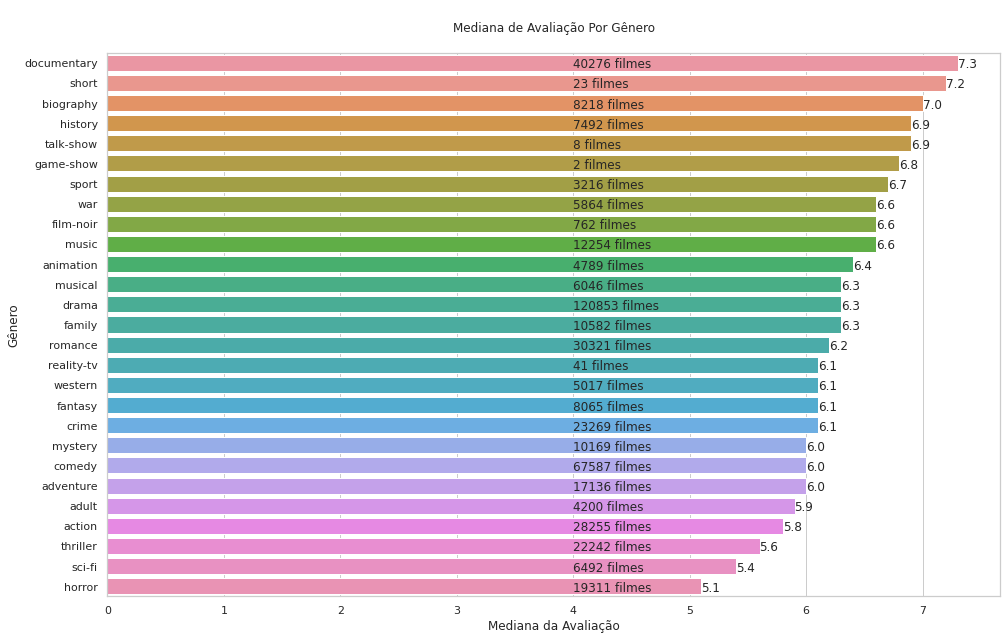

In [ ]:
# Plot

# Figura
plt.figure(figsize = (16,10))
# O objeto plt.figure tem esse tamanho.

# Barplot
sns.barplot(y = df_genero_ratings.genres, x = df_genero_ratings.rating, orient = "h")
# O objeto sns.barblot tem o y como sendo os gêneros e o x como sendo os ratings.
# as barras ficarão na horizontal

# Textos do gráfico
for i in range(len(df_genero_ratings.index)): #Para cada item no alcance até o tamanho dos índices da tabela (ou seja, de 0 até o último índice)
    
    plt.text(4.0, # 40 de distância da esquerda
             i + 0.25, # i+0.25 de distância da base para cima
             str(df_genero_ratings['count'][df_genero_ratings.index[i]]) + " filmes")
    # Coloque o texto N+" filmes"
    #sendo N o número na coluna 'count' e na linha index i.
    
    plt.text(df_genero_ratings.rating[df_genero_ratings.index[i]], # X de distância da esquerda, sendo X o tamanho da barra, que é o valor na coluna rating (df_genero_ratings.rating) correspondente à barra atual ([df_genero_ratings.index[i]])
             i + 0.25, # i+0.25 de distância da base para cima
             round(df_genero_ratings["rating"][df_genero_ratings.index[i]],2))
    # Coloque o número arredondado a duas casas equivalente à coluna 'rating' e a linha do index atual.

plt.ylabel('Gênero') # O título do eixo Y é 'Gênero'      
plt.xlabel('Mediana da Avaliação') # O título do eixo X é 'Mediana da Avaliação'
plt.title('\nMediana de Avaliação Por Gênero\n') # O título do gráfico é 'Mediana de Avaliação por Gênero', depois de pular uma linha.
plt.show() #Dá a ordem para mostrar o objeto plt.

## 4- Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?

Mediana de avaliação dos filmes.

In [ ]:
# Consulta SQL
consulta4 = '''
            SELECT rating AS Rating, premiered FROM 
            ratings JOIN titles ON ratings.title_id = titles.title_id 
            WHERE premiered <= 2022 AND type = 'movie'
            ORDER BY premiered
            '''

# Selecione as colunas 'rating' (como 'Rating') e 'premiered'
# da tabela 'rating' juntamente com a tabela 'titles', em que os ids sejam iguais.
# onde 'premiered' <= 2022 e o tipo 'type' seja 'movie'.
# Ordenado pela 'premiered'.

In [ ]:
# Resultado
resultado4 = pd.read_sql_query(consulta4, conn)

#Aplicando a query acima na mesma conexão.

In [ ]:
display(resultado4)

# Listando cada item (que é um filme), mas mostrando apenas seu rating e seu ano de lançamento.

,Rating,premiered
0,6.4,1896
1,4.5,1897
2,3.9,1899
3,3.7,1899
4,6.0,1900
...,...,...
272605,5.9,2021
272606,5.4,2021
272607,6.6,2021
272608,6.0,2021


In [ ]:
# Calculamos a mediana ao longo do tempo (anos)
ratings = []
for year in set(resultado4['premiered']): # Para cada ano no set de anos:
    ratings.append(np.median(resultado4[resultado4['premiered'] == year]['Rating'])) # adicione à lista 'ratings' a mediana dos valores de 'Rating' onde o ano for igual ao ano do laço.

    # Esse verificador booleano (==) dentro do conchete de índice define uma condição para a média, agregando vários valores.

### TESTE ###

print(type(set(resultado4['premiered'])))
# Tipo 'set'

print(type(resultado4['premiered']))
# Série do pandas

print(set(resultado4['premiered']))
print(resultado4['premiered'])


# O set mostra cada item individualmente
# A série propriamente tem itens que se repetem.

<class 'set'>
<class 'pandas.core.series.Series'>
{1896, 1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
0         1896
1         1897
2         1899
3         1899
4         1900
          ... 
272605    2021
272606    2021
272607    2021
272608    2021
272609    2021
Name: premiered, Length: 272610, d

In [ ]:
type(ratings)

list

In [ ]:
ratings[1:10]
# As medianas de ratings de cada ano numa lista.

[4.5, 3.8, 5.85, 4.6, 3.5, 4.6, 5.4, 4.5, 3.6]

In [ ]:
# Lista de anos
anos = list(set(resultado4['premiered']))

# A função 'list' converte o set numa lista.

In [ ]:
anos[1:10]

[1897, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906]

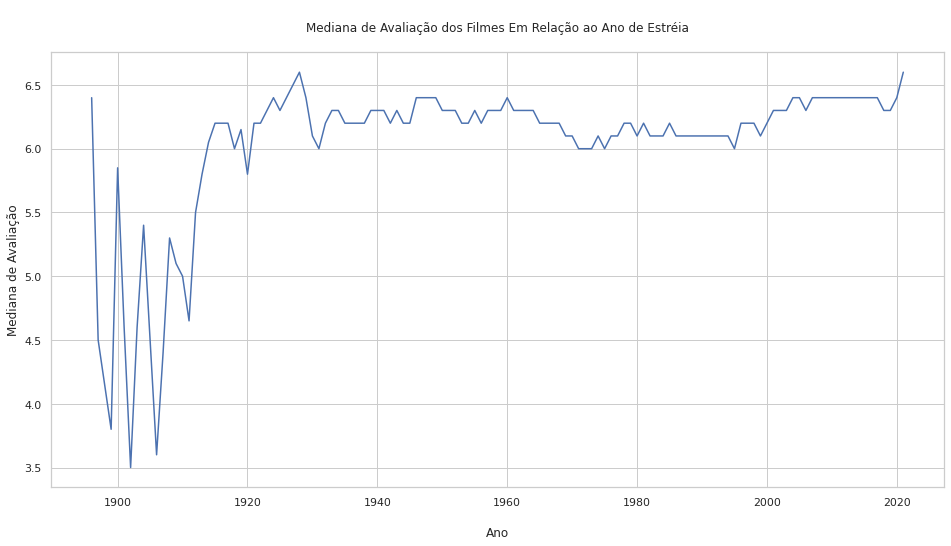

In [ ]:
# Plot
plt.figure(figsize = (16,8))
plt.plot(anos, ratings)
plt.xlabel('\nAno')
plt.ylabel('Mediana de Avaliação')
plt.title('\nMediana de Avaliação dos Filmes Em Relação ao Ano de Estréia\n')
plt.show()

## 5- Qual o Número de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia?

Número de filmes por gênero. Vamos listar os Top 5.

In [ ]:
# Consulta SQL
consulta5 = '''SELECT genres FROM titles ''' 

#Apenas a coluna 'genres' da tabela 'titles'.

In [ ]:
# Resultado
resultado5 = pd.read_sql_query(consulta5, conn)

In [ ]:
display(resultado5)

,genres
0,"Documentary,Short"
1,"Animation,Short"
2,"Animation,Comedy,Romance"
3,"Animation,Short"
4,"Comedy,Short"
...,...
8549341,"Action,Drama,Family"
8549342,"Action,Drama,Family"
8549343,"Action,Drama,Family"
8549344,Short


In [ ]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado5)

#Aplicando novamente a função que separa os gêneros em gêneros únicos.

<class 'list'>
29
28


In [ ]:
# Visualiza o resultado
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
# Agora fazemos a contagem
genero_count = []
for item in generos_unicos: # Para cada item em gêneros ùnicos
    consulta = 'SELECT COUNT(*) COUNT FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND premiered <= 2022'
    resultado = pd.read_sql_query(consulta, conn) #Aplica o COUNT àquele item.
    genero_count.append(resultado['COUNT'].values[0]) # E adiciona à lista criada antes do loop.

# Executando o COUNT para cada gênero.
# LEMBRETE: o COUNT devolve um número para uma tabela.

In [ ]:
# Prepara o dataframe
df_genero_count = pd.DataFrame()
df_genero_count['genre'] = generos_unicos
df_genero_count['Count'] = genero_count

# Novamente, um dataframe vazio.
# Então cria-se uma coluna 'genre' com a lista 'generos_unicos'
# E outra coluna 'Count' com a lista 'genero_count'.

In [ ]:
# Calcula os top 5
df_genero_count = df_genero_count[df_genero_count['genre'] != 'n'] #Elimina o gênero 'n'
df_genero_count = df_genero_count.sort_values(by = 'Count', ascending = False) # Organiza o dataframe por ordem de contagem, decrescente.
top_generos = df_genero_count.head()['genre'].values  # top_generos é um recorte do dataframe 

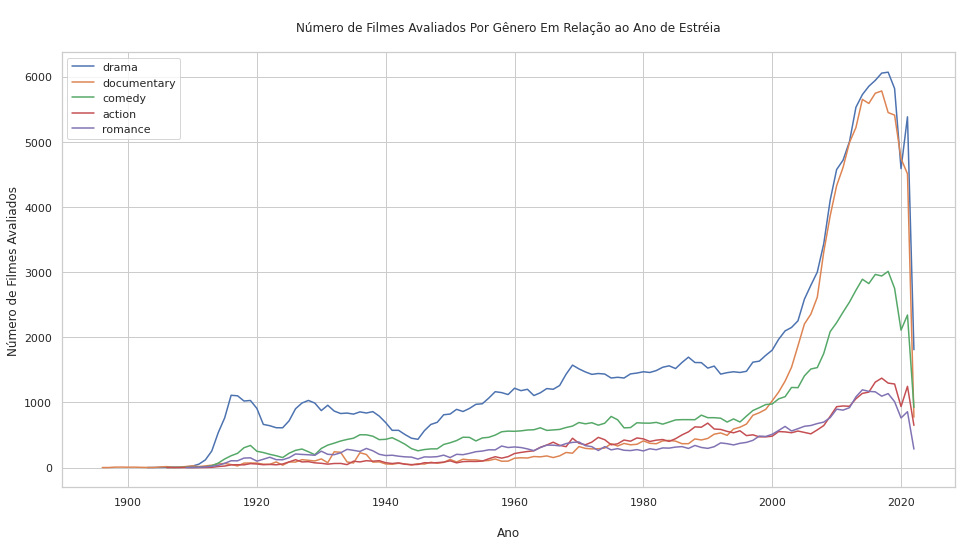

In [ ]:
# Plot

# Figura
plt.figure(figsize = (16,8))

# Loop e Plot
for item in top_generos: #Para cada item no top_generos:
    consulta = 'SELECT COUNT(*) Number_of_movies, premiered Year FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Year <=2022 GROUP BY Year'
    resultado = pd.read_sql_query(consulta, conn)
    plt.plot(resultado['Year'], resultado['Number_of_movies'])

    # Selecione COUNT (total)

plt.xlabel('\nAno')
plt.ylabel('Número de Filmes Avaliados')
plt.title('\nNúmero de Filmes Avaliados Por Gênero Em Relação ao Ano de Estréia\n')
plt.legend(labels = top_generos)
plt.show()

## 6- Qual o Filme Com Maior Tempo de Duração? Calcule os Percentis.

Percentis e filme mais longo da história.

In [ ]:
# Consulta SQL
consulta6 = '''
            SELECT runtime_minutes Runtime 
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ''' 

            # Selecione a coluna 'runtime_minutes' como 'Runtime'
            # da tabela Titles
            # onde 'type' for 'movie' e 'Runtime' for diferente de 'NaN'

In [ ]:
# Resultado
resultado6 = pd.read_sql_query(consulta6, conn)

In [ ]:
display(resultado6)

,Runtime
0,100
1,70
2,90
3,120
4,58
...,...
375596,123
375597,57
375598,100
375599,116


In [ ]:
# Loop para cálculo dos percentis
for val in range(101): 
    perc = round(np.percentile(resultado6['Runtime'].values, val), 2)
    print('{} percentil da duração (runtime) é: {}'.format(val, perc))

# Para cada valor num alcance de 0 a 100:
  # salva um número como 'perc' que é o percentil número 'val' calculado a partir dos valores do Runtime (resultado6['Runtime'].values)
  # Para cada volta no laço, um percentil é entregue
  # Então escreve qual é o percentil da vez e qual é o seu valor.

#Aqui, o resultado é dado apenas com um print mesmo.

0 percentil da duração (runtime) é: 1.0
1 percentil da duração (runtime) é: 45.0
2 percentil da duração (runtime) é: 48.0
3 percentil da duração (runtime) é: 50.0
4 percentil da duração (runtime) é: 50.0
5 percentil da duração (runtime) é: 52.0
6 percentil da duração (runtime) é: 52.0
7 percentil da duração (runtime) é: 54.0
8 percentil da duração (runtime) é: 55.0
9 percentil da duração (runtime) é: 56.0
10 percentil da duração (runtime) é: 58.0
11 percentil da duração (runtime) é: 59.0
12 percentil da duração (runtime) é: 60.0
13 percentil da duração (runtime) é: 60.0
14 percentil da duração (runtime) é: 60.0
15 percentil da duração (runtime) é: 62.0
16 percentil da duração (runtime) é: 63.0
17 percentil da duração (runtime) é: 65.0
18 percentil da duração (runtime) é: 66.0
19 percentil da duração (runtime) é: 68.0
20 percentil da duração (runtime) é: 69.0
21 percentil da duração (runtime) é: 70.0
22 percentil da duração (runtime) é: 71.0
23 percentil da duração (runtime) é: 72.0
24 

In [ ]:
# Refazendo a consulta e retornando o filme com maior duração
consulta6 = '''
            SELECT runtime_minutes Runtime, primary_title
            FROM titles 
            WHERE type = 'movie' AND Runtime != 'NaN'
            ORDER BY Runtime DESC
            LIMIT 1
            ''' 

# Selecione 'runtime_minutes' como 'Runtime', e 'primary_title'
# da tabela 'titles'
# onde 'type' é 'movie' e 'Runtime' não é 'NaN'
# Ordenado pelo Runtime de forma decrescente
# Limitado por 1 item, apenas.

In [ ]:
resultado6 = pd.read_sql_query(consulta6, conn)

In [ ]:
resultado6

,Runtime,primary_title
0,51420,Logistics


'Logistics' é o filme mais longo da história (até este momento), com 857 horas (51420 minutos). Dirigido por Daniel Andersson e Erika Magnusson, o filme acompanha todo o ciclo de vida de um pedômetro (dispositivo de rastreamento de passos) em ordem cronológica reversa.

## 7- Qual a Relação Entre Duração e Gênero?

Relação entre duração do filme e gênero.

In [ ]:
# Consulta SQL
consulta7 = '''
            SELECT AVG(runtime_minutes) Runtime, genres 
            FROM titles 
            WHERE type = 'movie'
            AND runtime_minutes != 'NaN'
            GROUP BY genres
            ''' 

In [ ]:
# Resultado
resultado7 = pd.read_sql_query(consulta7, conn)

In [ ]:
# Retorna gêneros únicos
generos_unicos = retorna_generos(resultado7)

<class 'list'>
29
28


In [ ]:
# Visualiza
generos_unicos

['action',
 'adult',
 'adventure',
 'animation',
 'biography',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'film-noir',
 'game-show',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'news',
 'reality-tv',
 'romance',
 'sci-fi',
 'short',
 'sport',
 'talk-show',
 'thriller',
 'war',
 'western']

In [ ]:
# Calcula duração por gênero
genero_runtime = []
for item in generos_unicos:
    consulta = 'SELECT runtime_minutes Runtime FROM  titles  WHERE genres LIKE '+ '\''+'%'+item+'%'+'\' AND type=\'movie\' AND Runtime!=\'NaN\''
    resultado = pd.read_sql_query(consulta, conn)
    genero_runtime.append(np.median(resultado['Runtime']))

In [ ]:
# Prepara o dataframe
df_genero_runtime = pd.DataFrame()
df_genero_runtime['genre'] = generos_unicos
df_genero_runtime['runtime'] = genero_runtime

In [ ]:
# Remove índice 18 (news)
df_genero_runtime = df_genero_runtime.drop(index = 18)

In [ ]:
# Ordena os dados
df_genero_runtime = df_genero_runtime.sort_values(by = 'runtime', ascending = False)

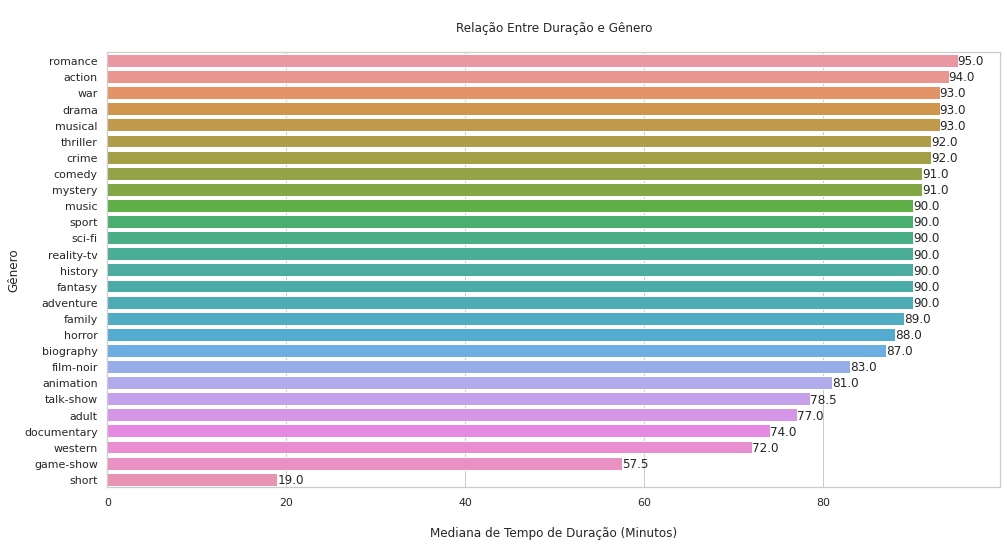

In [ ]:
# Plot

# Tamanho da figura
plt.figure(figsize = (16,8))

# Barplot
sns.barplot(y = df_genero_runtime.genre, x = df_genero_runtime.runtime, orient = "h")

# Loop
for i in range(len(df_genero_runtime.index)):
    plt.text(df_genero_runtime.runtime[df_genero_runtime.index[i]],
             i + 0.25,
             round(df_genero_runtime["runtime"][df_genero_runtime.index[i]], 2))

plt.ylabel('Gênero')             
plt.xlabel('\nMediana de Tempo de Duração (Minutos)')
plt.title('\nRelação Entre Duração e Gênero\n')
plt.show()

## 8- Qual o Número de Filmes Produzidos Por País?

Número de filmes produzidos por país.

In [ ]:
# Consulta SQL
consulta8 = '''
            SELECT region, COUNT(*) Number_of_movies FROM 
            akas JOIN titles ON 
            akas.title_id = titles.title_id
            WHERE region != 'None'
            AND type = \'movie\'
            GROUP BY region
            ''' 

# Selecione 'region' e conte quantos itens em cada região como 'Number_of_movies'
# de 'akas' junto com 'titles' em que os ids são iguais.
# Onde região é diferente de 'none'
# e tipo é \'movie\'
# agrupado por 'region'

In [ ]:
  # Resultado
resultado8 = pd.read_sql_query(consulta8, conn)

In [ ]:
display(resultado8)

,region,Number_of_movies
0,AD,22
1,AE,4026
2,AF,109
3,AG,12
4,AL,1248
...,...,...
229,YUCS,147
230,ZA,3114
231,ZM,12
232,ZRCD,2


In [ ]:
# Shape
resultado8.shape

(234, 2)

In [ ]:
## TESTE ###
print(type(resultado8.shape))

# O método cria uma tupla, mas não tenho certeza do que.
# Imagino que sejam (linha,colunas).

<class 'tuple'>


In [ ]:
# Número de linhas
resultado8.shape[0]

234

In [ ]:
# Listas auxiliares
nomes_paises = []
contagem = []

In [ ]:
# Loop para obter o país de acordo com a região
for i in range(resultado8.shape[0]): # Para cada item de 0 a 234 (que é o número de linhas do dataframe)
    try:                              # Tente
        coun = resultado8['region'].values[i] # salve  como 'coun' o valor na linha atual do loop na coluna 'region'
        nomes_paises.append(pycountry.countries.get(alpha_2 = coun).name) # Adicione à linha 'nomes_países' o resultado do método do pycountry que transforma sigla em nome por extenso.
        contagem.append(resultado8['Number_of_movies'].values[i]) # Adicione à lista 'contagem' o item na coluna 'Number of movies' equivalente à linha atual do loop.
    except:  # Se não conseguir
        continue # Teste o próximo.

# O método .values de um dataframe dá os valores, sem os nomes das colunas.
# Usando o índice com o nome de chamado do dataframe, pede-se apenas os valores de uma coluna
# Usando o índice após o método .values, pede-se por um item com aquele índice.

### OBSERVAÇÃO ###
# Deveria ser implementada uma forma de separar os que não puderam ser convertidos.

In [ ]:
### TESTE ###

print(resultado8.values)
print(type(resultado8.values))

# O .values cria um Nmpy.ndarray

print('-'*20)

print(resultado8['region'].values)
print(type(resultado8['region'].values))

# com um índice de coluna, .values ainda cria um Numpy.ndarray

print('-'*20)

print(resultado8.values[0])
print(type(resultado8.values[0]))

#Não importa o tipo de conjunto, sempre será um Numpy.ndarray.

[['AD' 22]
 ['AE' 4026]
 ['AF' 109]
 ['AG' 12]
 ['AL' 1248]
 ['AM' 302]
 ['AN' 8]
 ['AO' 52]
 ['AQ' 3]
 ['AR' 29332]
 ['AS' 2]
 ['AT' 15843]
 ['AU' 34264]
 ['AW' 9]
 ['AZ' 516]
 ['BA' 929]
 ['BB' 21]
 ['BD' 1564]
 ['BE' 16543]
 ['BF' 127]
 ['BG' 19609]
 ['BH' 34]
 ['BI' 13]
 ['BJ' 51]
 ['BM' 10]
 ['BN' 8]
 ['BO' 313]
 ['BR' 63998]
 ['BS' 51]
 ['BT' 39]
 ['BUMM' 39]
 ['BW' 2]
 ['BY' 301]
 ['BZ' 8]
 ['CA' 74162]
 ['CD' 27]
 ['CF' 3]
 ['CG' 84]
 ['CH' 4582]
 ['CI' 49]
 ['CL' 5673]
 ['CM' 159]
 ['CN' 13851]
 ['CO' 4493]
 ['CR' 292]
 ['CSHH' 4760]
 ['CSXX' 19]
 ['CU' 793]
 ['CV' 7]
 ['CY' 133]
 ['CZ' 8248]
 ['DDDE' 5072]
 ['DE' 68688]
 ['DJ' 2]
 ['DK' 30704]
 ['DM' 3]
 ['DO' 721]
 ['DZ' 501]
 ['EC' 335]
 ['EE' 4448]
 ['EG' 3828]
 ['EH' 2]
 ['ER' 10]
 ['ES' 64097]
 ['ET' 65]
 ['FI' 42232]
 ['FJ' 18]
 ['FO' 6]
 ['FR' 83180]
 ['GA' 21]
 ['GB' 156054]
 ['GD' 2]
 ['GE' 740]
 ['GH' 153]
 ['GI' 4]
 ['GL' 51]
 ['GM' 5]
 ['GN' 18]
 ['GP' 14]
 ['GQ' 2]
 ['GR' 58038]
 ['GT' 133]
 ['GU' 17]
 ['GW' 12]


In [ ]:
# Prepara o dataframe
df_filmes_paises = pd.DataFrame()
df_filmes_paises['country'] = nomes_paises
df_filmes_paises['Movie_Count'] = contagem

# Colocando as listas no dataframe novo.

In [ ]:
# Ordena o resultado
df_filmes_paises = df_filmes_paises.sort_values(by = 'Movie_Count', ascending = False)

In [ ]:
# Visualiza
df_filmes_paises.head(10)

,country,Movie_Count
199,United States,304107
65,United Kingdom,156054
96,Japan,89934
63,France,83180
89,India,77541
32,Canada,74162
47,Germany,68688
93,Italy,64554
58,Spain,64097
26,Brazil,63998


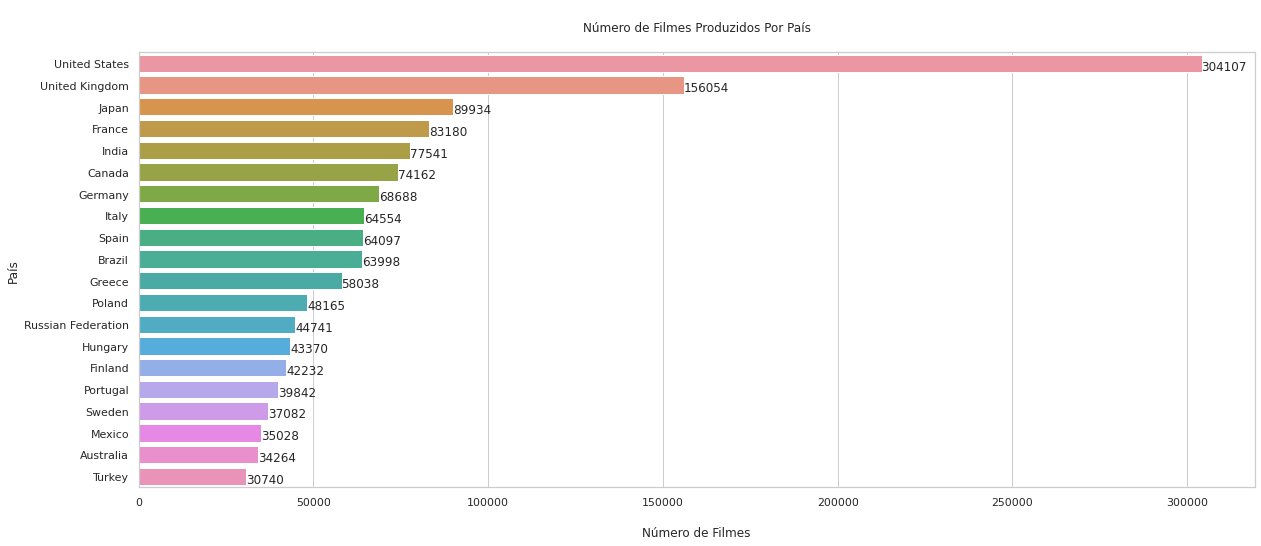

In [ ]:
# Plot

# Figura
plt.figure(figsize = (20,8))
# O tamanho do gráfico é de 20x8
# O tamanho é dado em uma tupla de dois itens.

# Barplot
sns.barplot(y = df_filmes_paises[:20].country, x = df_filmes_paises[:20].Movie_Count, orient = "h")
# O eixo x é composto do primeiro ao vigésimo pais;
# O eixo Y é composto da primeira à vigésima contagem de países.
# barplot na horizontal

# Loop
for i in range(0,20): # Para cada item num alcance de 20:
    plt.text(df_filmes_paises.Movie_Count[df_filmes_paises.index[i]]-1,
             i + 0.30,
             round(df_filmes_paises["Movie_Count"][df_filmes_paises.index[i]],2))

plt.ylabel('País')             
plt.xlabel('\nNúmero de Filmes')
plt.title('\nNúmero de Filmes Produzidos Por País\n')
plt.show()

## 9- Quais São os Top 10 Melhores Filmes?

Top 10 filmes com melhor avaliação e mais de 25 mil votos.

In [ ]:
# Consulta SQL
consulta9 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            '''

  # Selecione 'primary_title' como 'Movie_Name', 'genres' e 'rating'
  # da tabela 'titles' junto com 'ratings'
  # em que os IDs sejam iguais
  # onde  o tipo seja 'movie' e os votos pelo menos 25.000
  # em ordem decrescente de 'rating'
  # limitado a 10 resultados.

In [ ]:
# Resultado
top10_melhores_filmes = pd.read_sql_query(consulta9, conn)

In [ ]:
display(top10_melhores_filmes)

,Movie_Name,genres,rating
0,Jai Bhim,"Crime,Drama",9.4
1,The Shawshank Redemption,Drama,9.3
2,The Chaos Class,"Comedy,Drama",9.3
3,The Godfather,"Crime,Drama",9.2
4,Soorarai Pottru,Drama,9.1
5,CM101MMXI Fundamentals,"Comedy,Documentary",9.1
6,Mirror Game,"Crime,Mystery,Thriller",9.1
7,12 Angry Men,"Crime,Drama",9.0
8,The Godfather: Part II,"Crime,Drama",9.0
9,The Dark Knight,"Action,Crime,Drama",9.0


In [ ]:
### TESTE ###
consulta9_1 = '''
            SELECT primary_title AS Movie_Name, genres, rating, region
            FROM titles
            JOIN ratings ON titles.title_id = ratings.title_id
            JOIN akas ON akas.title_id = titles.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating DESC
            LIMIT 10          
            '''

In [ ]:
display(pd.read_sql_query(consulta9_1, conn))

,Movie_Name,genres,rating,region
0,Jai Bhim,"Crime,Drama",9.4,IN
1,Jai Bhim,"Crime,Drama",9.4,FR
2,Jai Bhim,"Crime,Drama",9.4,JP
3,Jai Bhim,"Crime,Drama",9.4,IT
4,Jai Bhim,"Crime,Drama",9.4,MX
5,Jai Bhim,"Crime,Drama",9.4,None
6,Jai Bhim,"Crime,Drama",9.4,BR
7,Jai Bhim,"Crime,Drama",9.4,CA
8,Jai Bhim,"Crime,Drama",9.4,CA
9,Jai Bhim,"Crime,Drama",9.4,AE


## 10- Quais São os Top 10 Piores Filmes?

Top 10 filmes com pior avaliação e mais de 25 mil votos.

In [ ]:
# Consulta SQL
consulta10 = '''
            SELECT primary_title AS Movie_Name, genres, rating
            FROM 
            titles JOIN ratings
            ON  titles.title_id = ratings.title_id
            WHERE titles.type = 'movie' AND ratings.votes >= 25000
            ORDER BY rating ASC
            LIMIT 10
            ''' 

In [ ]:
# Resultado
top10_piores_filmes = pd.read_sql_query(consulta10, conn)

In [ ]:
display(top10_piores_filmes)

,Movie_Name,genres,rating
0,Cumali Ceber,Comedy,1.0
1,Sadak 2,"Action,Drama",1.1
2,Smolensk,"Drama,Thriller",1.2
3,Reis,"Biography,Drama",1.4
4,The Cost of Deception,"Crime,Drama,History",1.5
5,Justin Bieber: Never Say Never,"Documentary,Music",1.6
6,Manos: The Hands of Fate,Horror,1.8
7,Superbabies: Baby Geniuses 2,"Comedy,Family,Sci-Fi",1.9
8,The Hottie & the Nottie,"Comedy,Romance",1.9
9,Radhe,"Action,Crime,Thriller",1.9


# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>

Parabéns se você chegou até aqui. Use o voucher PYTHONDSA9642 para comprar qualquer curso ou Formação da DSA com 5% de desconto.